# Part I - Ford GoBike System Data
## by Kiprop Yano 

## Introduction

The dataset used in this project in the Ford GoBike System Data. This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
from datetime import datetime


%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# display first 10 rows dataframe
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [4]:
# display last 10 rows dataframe
df.tail(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183402,122,2019-02-01 00:17:32.2580,2019-02-01 00:19:34.9380,119.0,18th St at Noe St,37.761047,-122.432642,120.0,Mission Dolores Park,37.761420,-122.426435,4326,Subscriber,NaN,NaN,No
183403,249,2019-02-01 00:15:12.0670,2019-02-01 00:19:21.6990,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,4642,Subscriber,2000.0,Male,No
183404,256,2019-02-01 00:12:50.5540,2019-02-01 00:17:07.3620,241.0,Ashby BART Station,37.852477,-122.270213,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,4845,Subscriber,1980.0,Male,Yes
183405,111,2019-02-01 00:14:49.8740,2019-02-01 00:16:41.3010,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,19.0,Post St at Kearny St,37.788975,-122.403452,4832,Subscriber,1984.0,Male,No
183406,706,2019-02-01 00:04:40.6160,2019-02-01 00:16:27.0800,138.0,Jersey St at Church St,37.750900,-122.427411,78.0,Folsom St at 9th St,37.773717,-122.411647,5017,Subscriber,1988.0,Male,No
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [5]:
# overview of the composition of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [6]:
# Displaying rows and columns
df.shape

(183412, 16)

In [7]:
#  Removing unwanted columns 'NaN' values 

df.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

# test that column drop is successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 16.8+ MB


In [8]:
# checking if there are duplicates
sum(df.duplicated())

0

In [9]:
# Finding how many bikes there are in this dataset
df.bike_id.nunique()

4646

In [10]:
# changing data type of start_time and end_time to datetime.
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [11]:
# new columns from start_time
df['start_month'] = df.start_time.dt.month
df['start_weekday'] = df.start_time.dt.weekday 
df['start_hour'] = df.start_time.dt.hour

In [12]:
# converting seconds to minutes
df['duration_minutes'] = df['duration_sec']/60

In [13]:
# descriptive statistics for numeric variables
df.describe()

,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year,start_month,start_weekday,start_hour,duration_minutes
count,183412.000000,183215.000000,183215.000000,183412.000000,175147.000000,183412.0,183412.000000,183412.000000,183412.000000
mean,726.078435,138.590427,136.249123,4472.906375,1984.806437,2.0,2.632178,13.458421,12.101307
std,1794.389780,111.778864,111.515131,1664.383394,10.116689,0.0,1.814786,4.724978,29.906496
min,61.000000,3.000000,3.000000,11.000000,1878.000000,2.0,0.000000,0.000000,1.016667
25%,325.000000,47.000000,44.000000,3777.000000,1980.000000,2.0,1.000000,9.000000,5.416667
50%,514.000000,104.000000,100.000000,4958.000000,1987.000000,2.0,3.000000,14.000000,8.566667
75%,796.000000,239.000000,235.000000,5502.000000,1992.000000,2.0,4.000000,17.000000,13.266667
max,85444.000000,398.000000,398.000000,6645.000000,2001.000000,2.0,6.000000,23.000000,1424.066667


In [14]:
# Verifying the change in Dimensions

df.sample

<bound method NDFrame.sample of         duration_sec              start_time                end_time  \
0              52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1              42521 2019-02-28 18:53:21.789 2019-03-01 06:42:03.056   
2              61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3              36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4               1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5               1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   
6               1147 2019-02-28 23:55:35.104 2019-03-01 00:14:42.588   
7               1615 2019-02-28 23:41:06.766 2019-03-01 00:08:02.756   
8               1570 2019-02-28 23:41:48.790 2019-03-01 00:07:59.715   
9               1049 2019-02-28 23:49:47.699 2019-03-01 00:07:17.025   
10               458 2019-02-28 23:57:57.211 2019-03-01 00:05:35.435   
11               506 2019-02-28 23:56:55.540 2019-03-01 00:05:21.733   
12              1176 2019-02-28 

In [15]:
#Labels to use in plots 
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#creating weekday name variable 
df['start_weekday'] = df.start_time.dt.strftime('%a')

### What is the structure of your dataset?

There are 183412 rows and 16 columns in this dataset. 


### What is/are the main feature(s) of interest in your dataset?

The main feature of interest in my dataset is the average duration of bike. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Features such as gender, age, duratiion, day, month and year will be valuable in supporting my investigation into the features of interest

## Univariate Exploration


#### 1. Number of users per the Type of user (Subscriber or Customer)
#### 2. Number of users per Gender (Male, female or others)
#### 3. Number of users per weekdays 
#### 4. Number of users per Bike sharing 

In [16]:
# Define and use a simple function to label the plot in axes coordinates
def mycountplots (df , xvar , ax , color = None , orient =None, order =None, color_order=None ):
  sb.countplot(data =df , x=xvar , ax=ax , color = color)
  ax.set_xlabel(f' {xvar}'.title() , fontsize = 10)
  if color:
    ax.set_title(f'Number of Users {xvar} by {color}'.title(), fontsize = 12)
  else:
    ax.set_title(f'Number of Users per {xvar}'.title(), fontsize = 12)
    
# create list for the quantitative variables
variables = ['user_type' , 'member_gender', 'bike_share_for_all_trip', 'start_weekday']


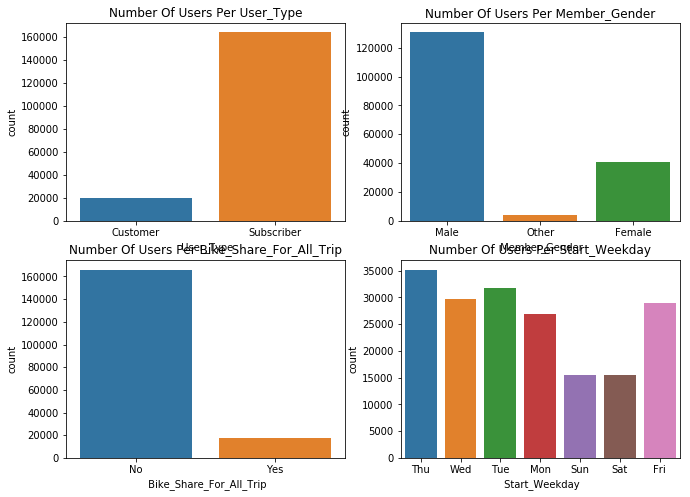

In [17]:
#Plot the function
fig , ax = plt.subplots(2 , 2, figsize  = [11 ,8])
for axes , x in zip(ax.flatten() , variables):
    mycountplots(df , x , axes)

From the above visualization, we can deduce the following: 

1. There are 160,000 susbscribed users and 20,000 customers. This is an indication that those using Fordgo bikes have subscribed to the system. 

2. Most users are male then followed by women. 

3. The most daily rides occur on Thursday with the least being Sartuday and Sunday 

4. Most users do not share their bikes.


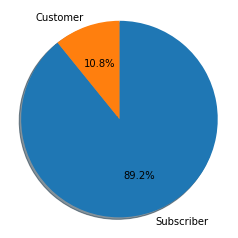

In [18]:
# The above visualization can be shown using a pie chart 
# plot a pie chart
user_category = df['user_type'].value_counts()
plt.pie(user_category, labels = user_category.index, shadow = True, startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.axis('square')
plt.show()

Most users (89.2%) are subscribers more than the actual customers who comprise only 10.8%. 

#### 5. Average trip duration 

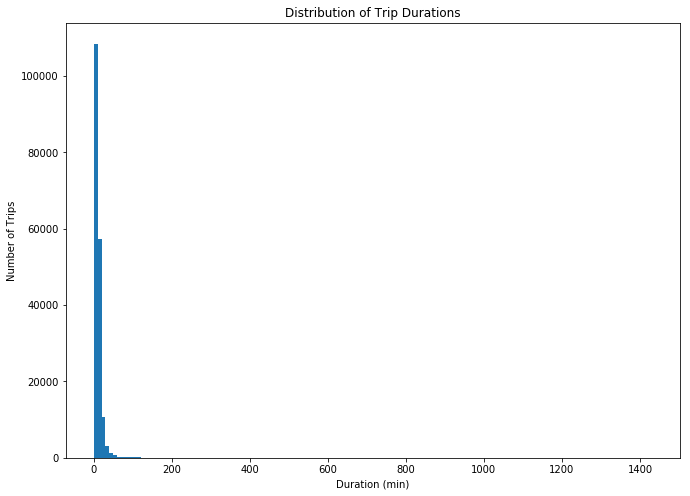

In [19]:
# histogram plot displaying bike trips in minutes
binsize = 10
bins = np.arange(0, df['duration_minutes'].max()+binsize, binsize)

plt.figure(figsize=[11, 8])
plt.hist(data = df, x = 'duration_minutes', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Trips')
plt.show()


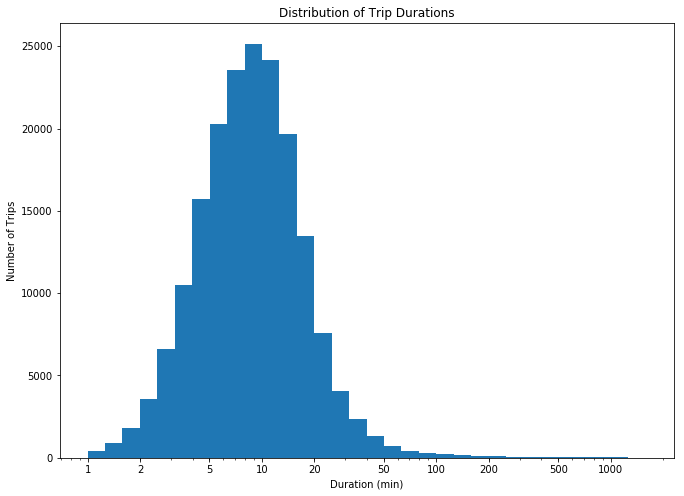

In [20]:
# logarthmic scale transformation on a histogram
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.1
log_bins = 10 ** np.arange(0.0, np.log10(df['duration_minutes'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[11, 8])
plt.hist(data = df, x = 'duration_minutes', bins = log_bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Trips')
plt.xscale('log')
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
plt.xticks(tick_locs, tick_locs)
plt.show()

The first distribution was long -tailed which forced to me plotting on a log scale which looked more of bimodal. 

From the above visualization, most of the bike trips were between 8 and 15 minutes and not a lot of bikes lasted over 40 minutes and less than 3 minutes. 

The mean bike duration was 12 minutes with the longest being 1424 minutes.

#### 6. Age distribution 


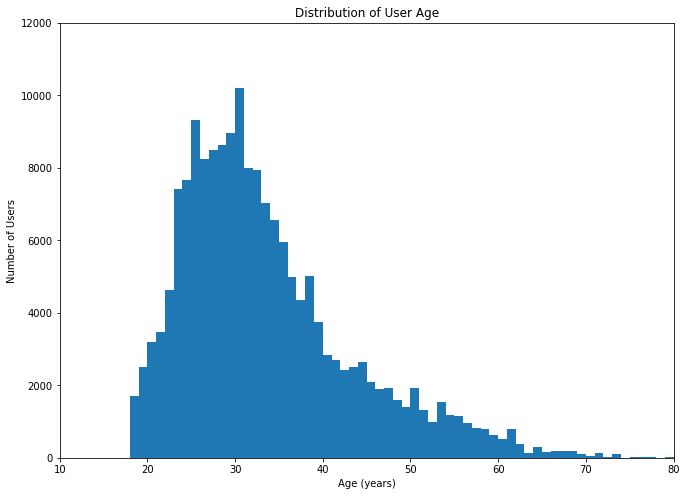

In [21]:
# Plotting age distribution derived from member's birth year.
binsize = 1
bins = np.arange(0, df['member_birth_year'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[11, 8])
plt.hist(data = df.dropna(), x = 'member_birth_year', bins = bins)
plt.axis([1939, 2009, 0, 12000])
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], [(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
plt.title('Distribution of User Age')
plt.xlabel('Age (years)')
plt.ylabel('Number of Users')
plt.show()

Most users are aged between 20 and 40 years 

#### 7. Most common start station 

In [22]:
start_counts = df['start_station_name'].value_counts().reset_index(name='number_of_trips')[:15]
start_order=start_counts['index']
start_sub=df.loc[df['start_station_name'].isin(start_counts["index"])]

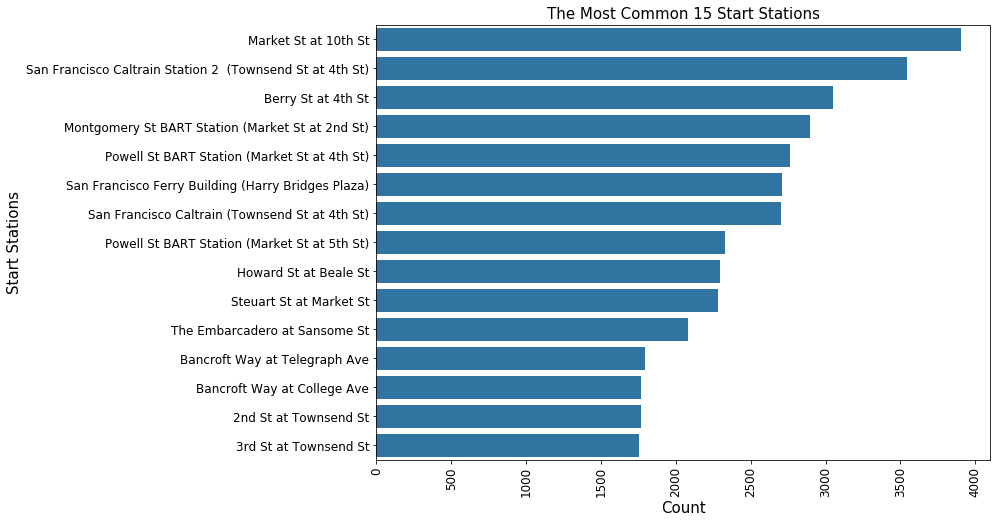

In [23]:
base_color=sb.color_palette()[0]
plt.figure(figsize=[11,8])
ax=sb.countplot(data=start_sub,y='start_station_name', color=base_color, order=start_order)
plt.xticks(rotation=90,size=12)
plt.yticks(size=12)
plt.ylabel('Start Stations',size=15)
plt.xlabel('Count',size=15)
plt.title('The Most Common 15 Start Stations',size=15);

The most common start station is at Marked St at 10th st. 

#### 8. Most common end stations 

In [24]:
end_counts = df['end_station_name'].value_counts().reset_index(name='number_of_trips')[:15]
end_order=end_counts['index']
end_sub=df.loc[df['end_station_name'].isin(end_counts["index"])]

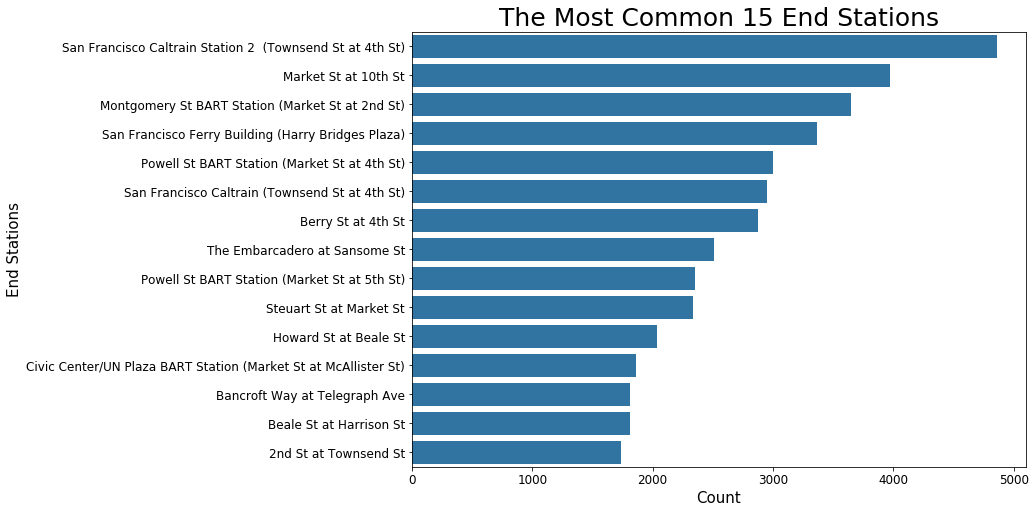

In [25]:
plt.figure(figsize=[11,8])
ax=sb.countplot(data=end_sub,y='end_station_name', color=base_color,order=end_order)
plt.ylabel('End Stations',size=15)
plt.xlabel('Count',size=15)
plt.title('The Most Common 15 End Stations',size=25)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)

The most common end station is San Franscisco Caltrain Station 2 (Townsend St at 4th St.)

#### 9. Start hour of the trip 

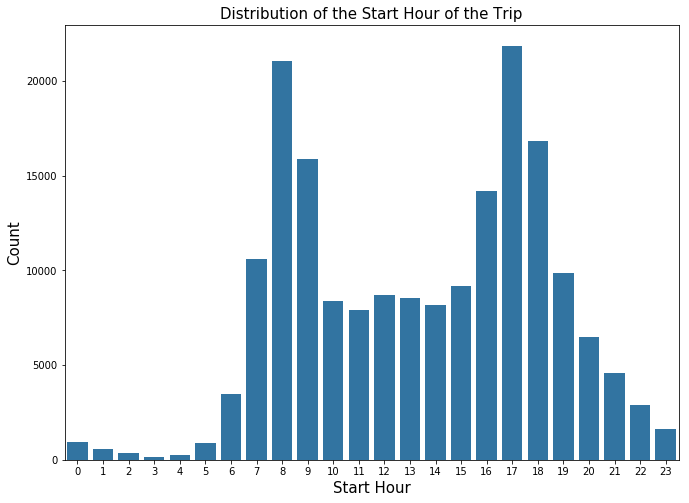

In [26]:
# Plot a bar chart to show the distribution of the Start Hour of the Trip
plt.figure(figsize=[11, 8])
sb.countplot(data=df, x='start_hour',color=base_color)
plt.xlabel('Start Hour',size=15)
plt.ylabel('Count',size=15)
plt.title('Distribution of the Start Hour of the Trip',size=15);

Above visualization shows that 8 am and 5 pm are the most peak times of trips. Most trips start between 0700 hrs to 0900 hrs and 1600 hrs to 1800 hrs.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There were unusual points since when I visualized the average bike duration, there was a large range of values, forcing me to logarithmic transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Although everything came out as expected, I was shocked to find that of the days of the week, Thursday had the highest bike start trips as opposed to weekends. This I will unearth in the subsequent sections. 

## Bivariate Exploration

I will look into:
1. the connection between trip duration and other parameters such as age, gender, user type and bike sharing.
2. the connection between the age and bike sharing 


#### a. Age and Trip duration 

In [27]:
df['age'] = datetime.now().year - df.member_birth_year

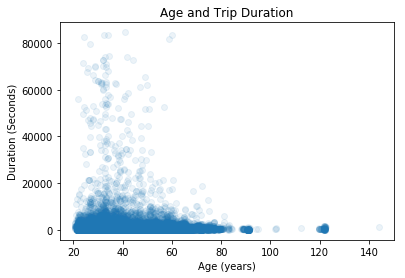

In [28]:
# Plot a scatterplot to show the correlation between age and trip duration 
sb.regplot(data=df,x='age',y='duration_sec',fit_reg=False, x_jitter=0.4, scatter_kws={'alpha':1/12})
plt.xlabel('Age (years)')
plt.ylabel('Duration (Seconds)')
plt.title('Age and Trip Duration');

Scatterplot indicates a negative correlation between trip duration adn age. The older the user, the shorter the duration of the trip.

#### b. Trip duration and gender 

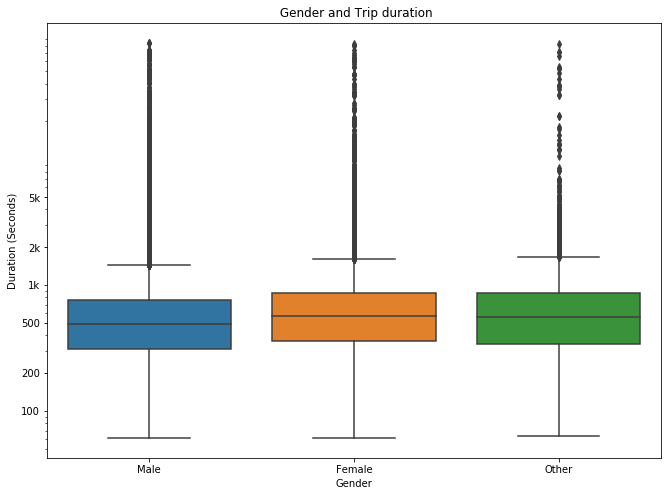

In [29]:
#Plot a box plot to show the relationship between gender and trip duration 
plt.figure(figsize=[11, 8])
sb.boxplot(data=df,x='member_gender',y='duration_sec',order=['Male','Female','Other'])
plt.yscale('log')
y_ticklocs=[100,200,500,1e3,2e3,5e3]
y_ticklabels=['100','200','500','1k','2k','5k']
plt.yticks(y_ticklocs,y_ticklabels)
plt.xlabel('Gender')
plt.ylabel('Duration (Seconds)')
plt.title(' Gender and Trip duration');


The above box plot shows that females have longer trips as compared to males. 

#### c. Trip duration and user type 

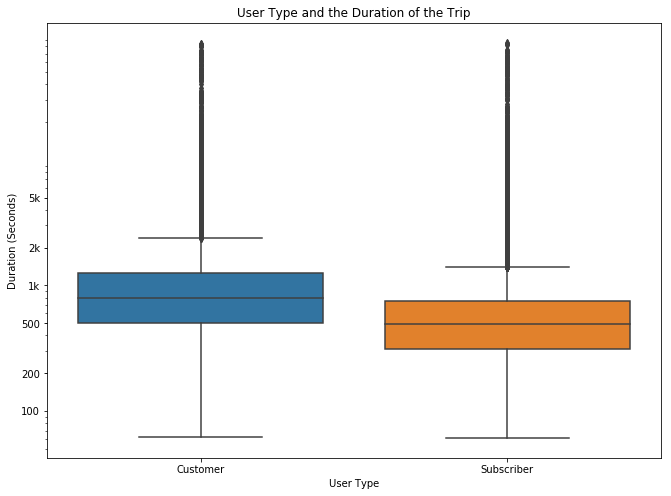

In [30]:
#Plot a box plot to show the connection between ser Type and the Duration of the Trip

plt.figure(figsize=[11,8])
sb.boxplot(data=df,x='user_type',y='duration_sec')
plt.yscale('log')
y_ticklocs=[100,200,500,1e3,2e3,5e3]
y_ticklabels=['100','200','500','1k','2k','5k']
plt.yticks(y_ticklocs,y_ticklabels)
plt.xlabel('User Type')
plt.ylabel('Duration (Seconds)')
plt.title('User Type and the Duration of the Trip');

From the above box plot, customers have longer trips than subscribers.

#### d. Bike sharing and trip duration 

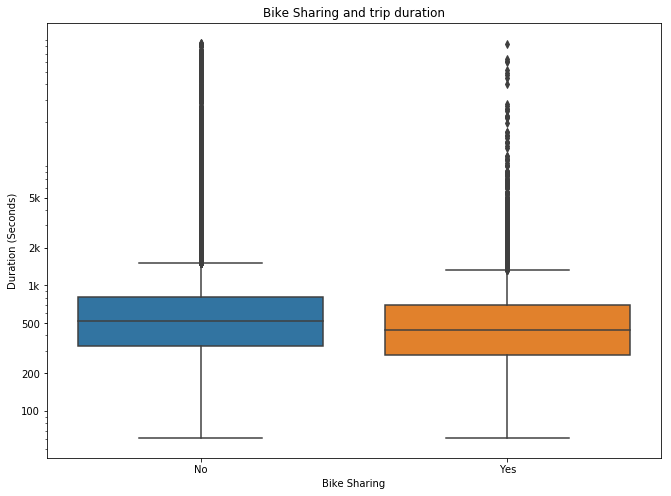

In [31]:
# Plot a box plot to show the correlation between bike sharing and duration of the trip 
plt.figure(figsize=[11,8])
sb.boxplot(data=df,x='bike_share_for_all_trip',y='duration_sec')
plt.yscale('log')
y_ticklocs=[100,200,500,1e3,2e3,5e3]
y_ticklabels=['100','200','500','1k','2k','5k']
plt.yticks(y_ticklocs,y_ticklabels)
plt.xlabel('Bike Sharing')
plt.ylabel('Duration (Seconds)')
plt.title('Bike Sharing and trip duration');

The above box plot shows that sharing the bike for all trip is inversely related to the duration of the trip.

#### e. The connection between the age and bike sharing  

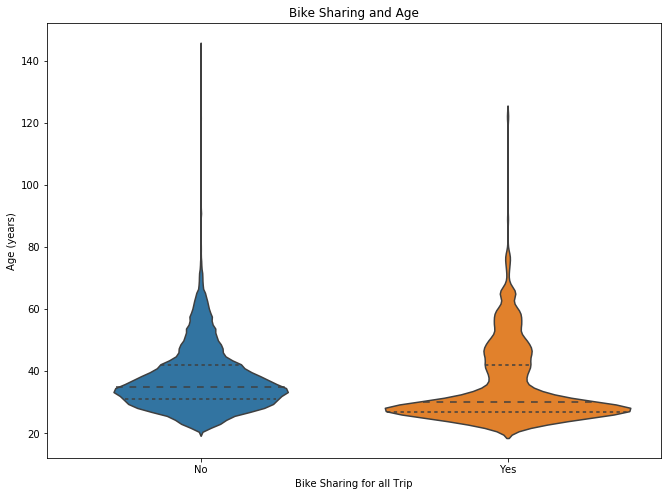

In [32]:
plt.figure(figsize=[11,8])
sb.violinplot(data=df,x='bike_share_for_all_trip',y='age', inner='quartile')
plt.xlabel('Bike Sharing for all Trip')
plt.ylabel ('Age (years)');
plt.title('Bike Sharing and Age');

Bike sharing mostly occurs with young users between 20 and 30 years 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1. Sharing of bike for all trip is inversely related to the duration of the trip.
2. Customers have longer trip durations than subscribers.
3. Females have longer trip durations as compared to males. 
4. There is a weak negative relationship between trip duration adn age. The older the user, the shorter the duration of the trip.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

People who share bikes are mostly aged between 20 to 30 years. 

## Multivariate Exploration
I will further explore the relationship between age distribution, gender and trip durations. 

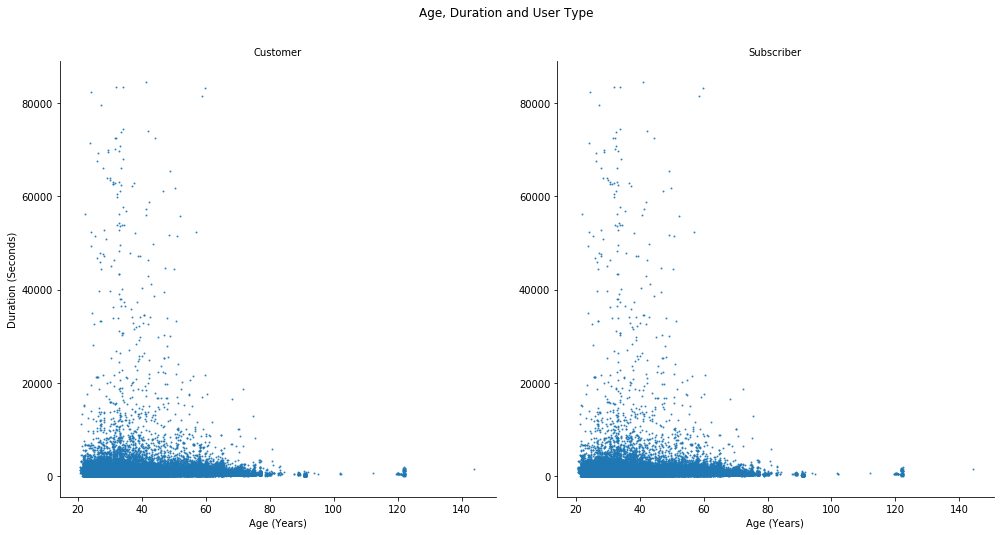

In [33]:
g=sb.FacetGrid(data=df,col='user_type', aspect = 2)
g.map(sb.regplot,data=df, x='age',y='duration_sec',fit_reg=False, x_jitter=0.4, scatter_kws={'s':1})
g.set_titles('{col_name}')
g.set_axis_labels('Age (Years)','Duration (Seconds)')
plt.suptitle('Age, Duration and User Type');

##set plot dimensions
g.fig.set_size_inches(14,8);

The  correlation between type of user (Customers and subscribers) age and trip duration is negative. This implies that the type of user has a minimal impact on the duration of trip and age of the user. 

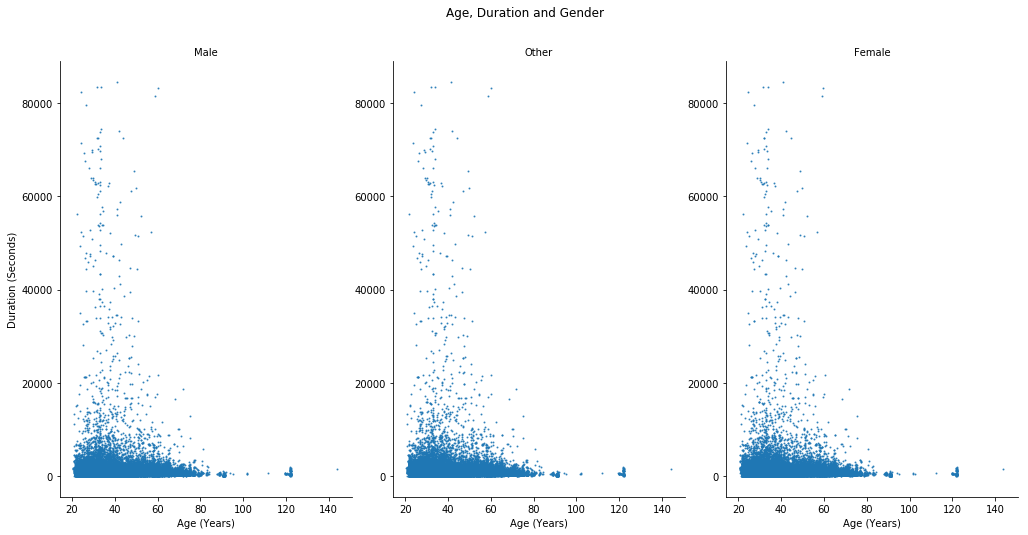

In [34]:
g=sb.FacetGrid(data=df,col='member_gender', aspect = 2)
g.map(sb.regplot,data=df, x='age',y='duration_sec',fit_reg=False, x_jitter=0.4, scatter_kws={'s':1})
g.set_titles('{col_name}')
g.set_axis_labels('Age (Years)','Duration (Seconds)')
plt.suptitle('Age, Duration and Gender');

##set plot dimensions
g.fig.set_size_inches(14,8);

In terms of gender, there is negative correlation between age and trip duration. This implies that gender has a minimal effect on the relationship between trip duration and age. 

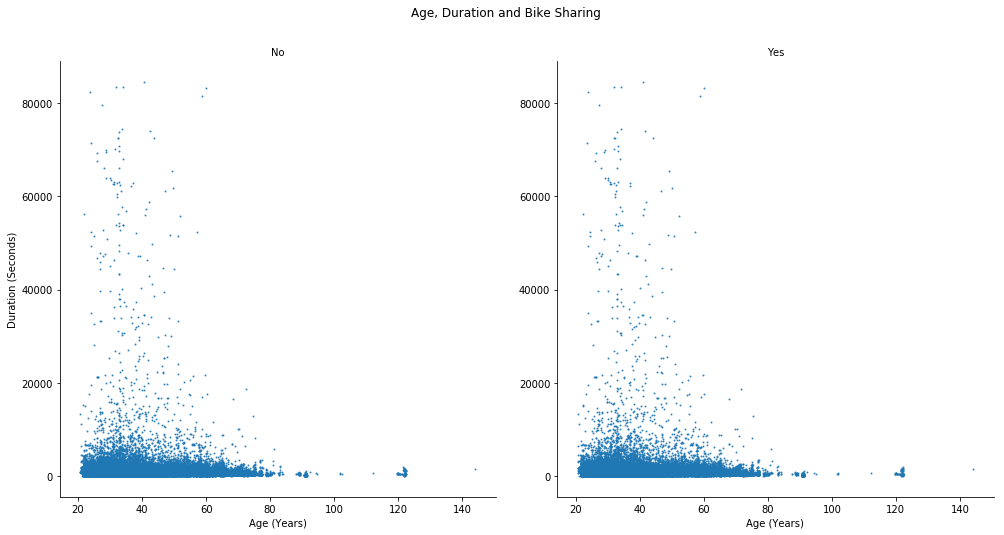

In [35]:
g=sb.FacetGrid(data=df,col='bike_share_for_all_trip',aspect=2)
g.map(sb.regplot,data=df, x='age',y='duration_sec',fit_reg=False, x_jitter=0.4, scatter_kws={'s':1})
g.set_titles('{col_name}')
g.set_axis_labels('Age (Years)','Duration (Seconds)')
plt.suptitle('Age, Duration and Bike Sharing');

##set plot dimensions
g.fig.set_size_inches(14,8);

In terms of bike sharing, there is a negative correlation between age and trip dureation. This implies that sharing of bikes has less effect on the correlation between trip duration and age. 

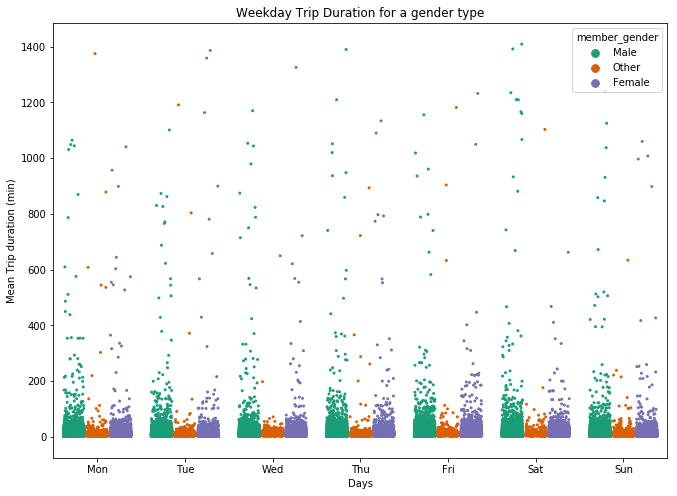

In [36]:
#Plot point plot 
plt.figure(figsize=[11, 8])
sns.stripplot(data = df, x = 'start_weekday', y = 'duration_minutes', hue = 'member_gender', palette = 'Dark2',
             jitter = 0.35, dodge = True, size = 3)
plt.title('Weekday Trip Duration for a gender type')
plt.ylabel('Mean Trip duration (min)')
plt.xlabel('Days')
plt.xticks(np.arange(0, 7, 1),weekday_labels)
plt.show()

From the above visualization, it can be deduced that men have the lowest trips while females have the highest mean trip duration. 

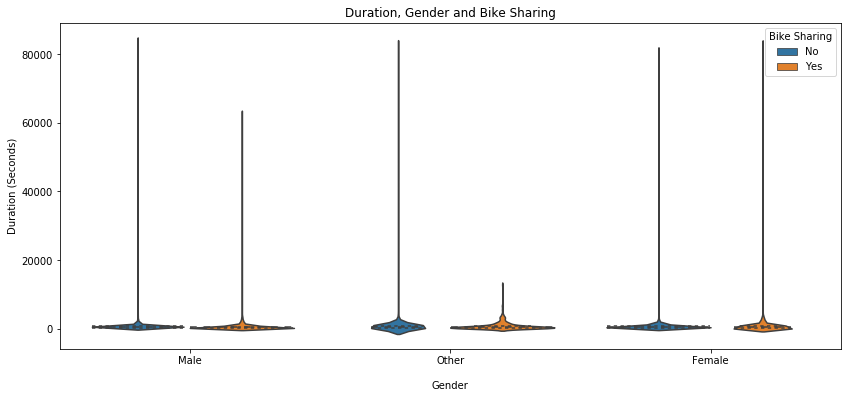

In [37]:
plt.figure(figsize=[14,6])
sb.violinplot(data=df,x='member_gender',y='duration_sec',hue='bike_share_for_all_trip',inner='quartile')
plt.xlabel('Gender', labelpad=15)
plt.ylabel('Duration (Seconds)')
plt.title('Duration, Gender and Bike Sharing')
plt.legend(title='Bike Sharing');

From the above visualization, we can deduce that bike Sharing increases the trip duration in all genders.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

There is a strong correlation between bike sharing, trip duration age and gender. 

### Were there any interesting or surprising interactions between features?

No

## Conclusions
The process of data exploration was successful, although some missing values in the dataset. 

From the ford go bike dataset, I can conclude that: 
1. Bike sharing happens among people aged between 20 to 30 years and they are the ones that share bikes mostly.
2. Bike sharing increases the trip duration.
3. In terms of gender, women have longer trip duration as opposed to males, despite being few. 


### References
https://www.kaggle.com/chirag02/ford-gobike-data-analysis

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

https://github.com/meet3012/Ford-GoBike-System-Data-Visualization/blob/master/Data-Exploration-with-Bike-Data.ipynb

https://github.com/adipurnamk/Ford-GoBike-System-Data/blob/master/exploration_fordgobike_2017.ipynb https://github.com/ijdev/Ford-GoBike-System-Data---Data-Analysis

https://mnalmelihi.github.io/z

https://github.com/ijdev/Ford-GoBike-System-Data---Data-Analysis

https://deepnote.com/@dain-russell/bike-exploration-328b5ba1-25e4-4a35-aaad-e70146c9e182
